In [0]:
# Author : Karthikeyan V
# Stack Overflow Case Study
# import the Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

Get the data from public S3 Storage to perform EDA

In [0]:
# read the Questions Dataset stored in AWS S3 public storage 
inpQues = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv", encoding="ISO-8859-1")

In [0]:
# read the Question Tags Dataset stored in AWS S3 public storage
inpQuesTags = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv", encoding="ISO-8859-1")

In [0]:
# read the Answers Dataset stored in AWS S3 public storage 
inpAns = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv", encoding="ISO-8859-1")

In [0]:
# read the Users Dataset stored in AWS S3 public storage 
inpUsers = pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv", encoding="ISO-8859-1")

**Data Analysis on Data Sets**

*   Identify the data types of the four Data Sets

**Question Data Set**

*   OwnerUserId should be converted to int
*   CreationDate & CloseDate converted to date type for calculation purposes
*   Not Removing the NaN values from OwnerUserId column, impute the value as zero so that we can decide later whether this can be dropped or not

**New Columns introduced**

*   **IsQuestionOpen** - Y/N This is used to check whether Question is open or not
*   **IsDataScience** - Y/N This is used to check whether Question is related to DataScience or not
*   **TimeTakenToClose** - Time Taken to close a Question

**Tags Data Set**
*   Not removing the NaN values from Tag column, impute the value to undefined so that we can decide later whether this can be dropped or not
*   Remove the Duplicated rows keeping the first occurance



**Users Data Set** 
*   Remove the unnamed column
*   display_name column is null. Impute the value with "NA". We can decide if this can be used later


**Answers Data Set**
*   Not removing the NaN values from OwnerUserId column, impute the value to zero so that we can decide later whether this can be dropped or not
*   Change the CreationDate to a Date type column

**New Columns introduced**

*   IsDataScienceAnswer - Y/N Used to get the answers related to DataScience












In [6]:
inpQues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1264216 non-null int64
OwnerUserId     1249762 non-null float64
CreationDate    1264216 non-null object
ClosedDate      55959 non-null object
Score           1264216 non-null int64
Title           1264216 non-null object
Body            1264216 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


In [7]:
inpQuesTags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
Id     int64
Tag    object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


In [8]:
inpAns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
Id              int64
OwnerUserId     float64
CreationDate    object
ParentId        int64
Score           int64
Body            object
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


In [9]:
inpUsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 9 columns):
Unnamed: 0          int64
id                  int64
display_name        object
creation_date       object
last_access_date    object
reputation          int64
up_votes            int64
down_votes          int64
views               int64
dtypes: int64(6), object(3)
memory usage: 136.7+ MB


In [10]:
inpQues.head(5)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [11]:
inpAns.head(5)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [12]:
inpQuesTags.head(5)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [13]:
inpUsers.head(5)

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [14]:
inpUsers.tail(5)

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1990475,1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191
1990479,1990479,6107989,Nicky HFE,2016-03-24 06:25:14.09 UTC,2019-08-21 13:40:34.197 UTC,108,0,0,30


In [0]:
# Remove the Unnamed column from the Users Dataset
del inpUsers['Unnamed: 0']

In [0]:
# Remove duplicated rows from the Users Dataset ( User Shawn was duplicated 5 times)
inpUsers.drop_duplicates(subset=None, keep='first', inplace=True)

In [17]:
# Check if there nulls in the display_name
inpUsers.display_name.isnull().sum()

24

In [0]:
# Fill the display_name with "NA" in the user data set
inpUsers["display_name"].fillna("NA", inplace = True)

In [19]:
inpUsers.head(5)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


In [20]:
# Before removing the NaN values from OwnerUserId column, impute the value as zero so that we can decide later whether this can be dropped or not
# Before imputing check if there are any records with OwnerUserId = 0
inpQues[inpQues.OwnerUserId == 0]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body


In [0]:
# Before removing the NaN values from OwnerUserId column, impute the value as zero so that we can decide later whether this can be dropped or not
inpQues["OwnerUserId"].fillna(0, inplace = True)

In [22]:
inpQues[inpQues.OwnerUserId == 0]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
47,4170,0.0,2008-08-07T00:25:03Z,NaN,9,How to learn ADO.NET,<p>I need to learn ADO.NET to build applicatio...
130,12330,0.0,2008-08-15T15:06:31Z,NaN,6,Programmatically list WMI classes and their pr...,"<p>Hey everyone, \nIs there any known way of l..."
158,15190,0.0,2008-08-18T20:32:49Z,NaN,2,Changing CURRENT save/default directory in Del...,<p>I have a project group that contains a proj...
198,18250,0.0,2008-08-20T15:40:53Z,NaN,0,Creation Date of Compiled Executable (VC++ 2005),<p>The creation date of an executable linked i...
300,29100,0.0,2008-08-26T22:28:22Z,NaN,5,How are you generating tests from specifications?,"<p>I came across a printed <a href=""http://www..."
...,...,...,...,...,...,...,...
1261359,40076260,0.0,2016-10-16T22:38:59Z,NaN,1,How can I find out if two lines overlap?,<p>My function takes two objects that represen...
1261501,40079260,0.0,2016-10-10T15:10:51Z,NaN,0,"VB6.0 ""Run - time error '3709': The connection...","<p><a href=""http://i.stack.imgur.com/M2EV8.png..."
1263664,40130890,0.0,2016-10-19T12:02:24Z,2016-10-19T20:52:39Z,-4,How would i change my program so that the colo...,"<p><div class=""snippet"" data-lang=""js"" data-hi..."
1263908,40136590,0.0,2016-10-19T13:24:10Z,2016-10-19T16:37:57Z,0,Names of variables inside the 'for loop',<p>In <strong>my_data</strong> I want to creat...


In [23]:
inpQues.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

In [0]:
inpQues.OwnerUserId = inpQues.OwnerUserId.astype('int64')

In [25]:
inpQues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
Id              1264216 non-null int64
OwnerUserId     1264216 non-null int64
CreationDate    1264216 non-null object
ClosedDate      55959 non-null object
Score           1264216 non-null int64
Title           1264216 non-null object
Body            1264216 non-null object
dtypes: int64(3), object(4)
memory usage: 67.5+ MB


In [26]:
# Question Data Set - Null Checks
inpQues.isnull().sum()/len(inpQues)*100

Id               0.00000
OwnerUserId      0.00000
CreationDate     0.00000
ClosedDate      95.57362
Score            0.00000
Title            0.00000
Body             0.00000
dtype: float64

In [0]:
# Convert the CreationDate into DateTime Object so that we can perform data analysis based on date/time values
inpQues['CreationDate']=pd.to_datetime(inpQues['CreationDate'])

In [0]:
# Convert the ClosedDate into DateTime Object so that we can perform data analysis based on date/time values
inpQues['ClosedDate']=pd.to_datetime(inpQues['ClosedDate'])

In [0]:
# Create a new column to identify which are the Open questions from the dataset that doesn't have a closed date. We can identify the questions that are still not closed yet
inpQues['IsQuestionOpen'] = inpQues.apply(lambda row: "N" if pd.notnull(row.ClosedDate) else "Y", axis=1)

In [30]:
inpQues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 8 columns):
Id                1264216 non-null int64
OwnerUserId       1264216 non-null int64
CreationDate      1264216 non-null datetime64[ns, UTC]
ClosedDate        55959 non-null datetime64[ns, UTC]
Score             1264216 non-null int64
Title             1264216 non-null object
Body              1264216 non-null object
IsQuestionOpen    1264216 non-null object
dtypes: datetime64[ns, UTC](2), int64(3), object(3)
memory usage: 77.2+ MB


In [31]:
inpQues.head(5)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,IsQuestionOpen
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Y
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,N
2,120,83,2008-08-01 15:50:08+00:00,NaT,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Y
3,180,2089740,2008-08-01 18:42:19+00:00,NaT,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,Y
4,260,91,2008-08-01 23:22:08+00:00,NaT,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,Y


In [32]:
# Before that check if there any nulls in inpQuesTags dataset
inpQuesTags.isnull().sum()/len(inpQuesTags)*100

Id     0.000000
Tag    0.029672
dtype: float64

In [0]:
# Before removing the NaN values from Tag column, impute the value to undefined so that we can decide later whether this can be dropped or not
inpQuesTags["Tag"].fillna("undefined", inplace = True)

In [34]:
# Before that check if there any nulls in inpQuesTags dataset
inpQuesTags.isnull().sum()/len(inpQuesTags)*100

Id     0.0
Tag    0.0
dtype: float64

In [35]:
inpQuesTags[inpQuesTags.Tag=='undefined']

,Id,Tag
947,32280,undefined
4755,140030,undefined
6892,191640,undefined
11107,283190,undefined
11570,291340,undefined
...,...,...
3731254,39987010,undefined
3731869,39992410,undefined
3733313,40002640,undefined
3747098,40111540,undefined


In [0]:
# Check whether there are any duplicate rows in the inpQuesTags data set
DuplicatedTag = inpQuesTags[inpQuesTags.duplicated(subset=None, keep='first')]

In [37]:
len(DuplicatedTag)

13

In [38]:
DuplicatedTag

,Id,Tag
105260,1828130,undefined
395137,5515310,undefined
564961,7486530,undefined
1237665,14965450,undefined
1596213,18931930,undefined
1785132,21001320,undefined
1785133,21001320,undefined
1911014,22331830,undefined
1979513,23048910,undefined
2006547,23335580,undefined


In [39]:
inpQuesTags[inpQuesTags.Id == 5515310]

,Id,Tag
395135,5515310,javascript
395136,5515310,undefined
395137,5515310,undefined


In [0]:
inpQuesTags.drop(inpQuesTags.index[1785133],inplace=True)

In [41]:
inpQuesTags[inpQuesTags.Id == 21001320]

,Id,Tag
1785130,21001320,javascript
1785131,21001320,undefined
1785132,21001320,undefined
1785134,21001320,zero


In [0]:
inpQuesTags.drop_duplicates(subset=None, keep='first', inplace=True)

In [0]:
DuplicatedTag = inpQuesTags[inpQuesTags.duplicated(subset=None, keep='first')]

In [44]:
inpQues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 8 columns):
Id                1264216 non-null int64
OwnerUserId       1264216 non-null int64
CreationDate      1264216 non-null datetime64[ns, UTC]
ClosedDate        55959 non-null datetime64[ns, UTC]
Score             1264216 non-null int64
Title             1264216 non-null object
Body              1264216 non-null object
IsQuestionOpen    1264216 non-null object
dtypes: datetime64[ns, UTC](2), int64(3), object(3)
memory usage: 77.2+ MB


In [45]:
inpQuesTags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750981 entries, 0 to 3750993
Data columns (total 2 columns):
Id     int64
Tag    object
dtypes: int64(1), object(1)
memory usage: 85.9+ MB


In [46]:
mylist = inpQuesTags[inpQuesTags.Id == 21001320].transpose().values.tolist()[1]
mystr = ','.join(mylist)
mystr

'javascript,undefined,zero'

In [0]:
# Before finding all the questionS which are tagged under DataScience, create a new column in Question DataSet to hold whether the question belongs to a data Science or not
# Set the value as N by default
inpQues['IsDataScience'] = 'N'

In [0]:
#Time Taken to Close a question - Set as Zero
inpQues['TimeTakenToClose']=0

In [49]:
inpQues.head(5)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,IsQuestionOpen,IsDataScience,TimeTakenToClose
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Y,N,0
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,N,N,0
2,120,83,2008-08-01 15:50:08+00:00,NaT,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Y,N,0
3,180,2089740,2008-08-01 18:42:19+00:00,NaT,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,Y,N,0
4,260,91,2008-08-01 23:22:08+00:00,NaT,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,Y,N,0


In [0]:
dataScienceTagList=['r', 'matlab', 'excel','sql', 'sas', 'python']
dataScienceTagList
# Impute in a new column whether the Question belongs to the DataScience Category or not in the Questions DataSet
for dataScienceTag in dataScienceTagList:
  QuestionList = inpQuesTags[inpQuesTags['Tag'].str.lower()==dataScienceTag].Id.tolist()
  inpQues.loc[inpQues.Id.isin(QuestionList),"IsDataScience"]="Y"

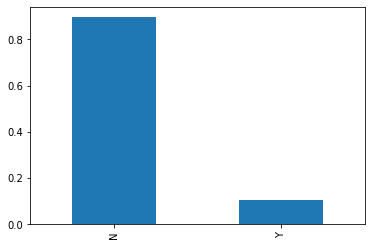

In [51]:
# % of Questions related to Data Science and Non-DataScience
inpQues.IsDataScience.value_counts(normalize=True).plot(kind="bar")

In [52]:
# Check if the TimeTakenToClose has been computed
inpQues.head(5)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,IsQuestionOpen,IsDataScience,TimeTakenToClose
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,Y,N,0
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,N,N,0
2,120,83,2008-08-01 15:50:08+00:00,NaT,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Y,Y,0
3,180,2089740,2008-08-01 18:42:19+00:00,NaT,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,Y,N,0
4,260,91,2008-08-01 23:22:08+00:00,NaT,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,Y,N,0


In [0]:
inpAns['CreationDate']=pd.to_datetime(inpAns['CreationDate'])

**UNIVARIATE AND BIVARIATE ANALYSIS**

**Questions Data Set with a lot of Bar Charts**

*   Number of Questions still open for DataScience
*   Average Time Taken to Close a Data Science Question
*   Average Time Taken to Close a Question in Stack Overflow
*   Average for a Data Science Question that is closed
*   Average  for a Data Science Question that is Open
*   Mean Score between Data Science and Non-Data Science
*   Mean TimeTaken between Data Science and Non-Data Science
*   **Pair Plot** : Relationship between TimeTakenToClose a question and the Score to the Question


**Users Data Set**

*   Create a dataframe called "***reputedUsers***" and find the users who asked DataScience Questions.
*   **Scatter Chart** : Correlation between reputation and upvotes in Users Data Set
*   **Scatter Chart** : Correlation between reputation and downvotes

In [55]:
# of Questions still open in DataScience
inpQues[inpQues.IsDataScience=='Y'].IsQuestionOpen.value_counts()

Y    125110
N      6965
Name: IsQuestionOpen, dtype: int64

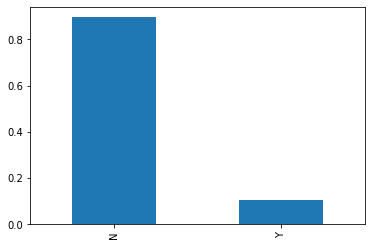

In [57]:
# % of Questions related to Data Science and Non-DataScience
inpQues.IsDataScience.value_counts(normalize=True).plot(kind="bar")

In [0]:
# Calculate the Time Taken to Close a question
inpQues['TimeTakenToClose']=(inpQues['ClosedDate']-inpQues['CreationDate']).dt.days

In [59]:
# Average Time Taken to Close a Data Science Question
inpQues[(inpQues.IsDataScience=='Y') & (inpQues.IsQuestionOpen=='N')].TimeTakenToClose.mean()

83.86977745872218

In [60]:
# Average Time Taken to Close a Question
inpQues.TimeTakenToClose.mean()

137.7620221948212

In [62]:
# Average Score for a Data Science Question that is closed
inpQues[(inpQues.IsDataScience=='Y') & (inpQues.IsQuestionOpen=='N')].Score.mean()

0.7491744436468054

In [61]:
# Average Score for a Data Science Question that is Open
inpQues[(inpQues.IsDataScience=='Y') & (inpQues.IsQuestionOpen=='Y')].Score.mean()

1.767052993365838

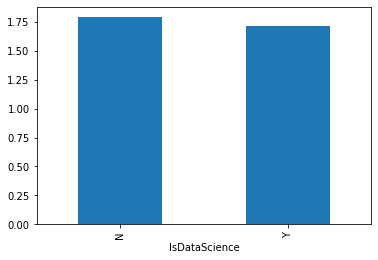

In [63]:
# Mean Score between Data Science and Non-Data Science
inpQues.groupby('IsDataScience')['Score'].mean().plot(kind="bar")

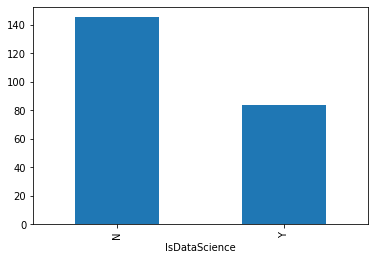

In [64]:
# Mean Time Taken between Data Science and Non-Data Science
inpQues.groupby('IsDataScience')['TimeTakenToClose'].mean().plot(kind="bar")

In [65]:
inpUsers.head(5)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


In [66]:
UserListWhoAskedDataScienceQuestions = inpQues[inpQues.IsDataScience=='Y'].OwnerUserId.unique().tolist()
reputedUsers = inpUsers[inpUsers.id.isin(UserListWhoAskedDataScienceQuestions)]
print(reputedUsers)

              id          display_name  ... down_votes  views
87            61               Bernard  ...        219   1731
107           50            helloandre  ...         50   1731
182        16632                hadley  ...        938  42630
440          905                 Keith  ...        189   5754
524          342          graham.reeds  ...        107   4147
...          ...                   ...  ...        ...    ...
1990292  7039394  ÃÂÃÂ¾ÃÂÃÂ¸ÃÂ  ...          0      2
1990298  5191953                Reiion  ...          0    424
1990328  1726404                 Kevin  ...          0    224
1990462   839224           Jean Pierre  ...          0     20
1990478  4605946         space_voyager  ...          1    191

[31786 rows x 8 columns]


In [67]:
reputedUsers.tail(5)

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1990292,7039394,ÃÂÃÂ¾ÃÂÃÂ¸ÃÂ,2016-10-19 00:27:12.08 UTC,2016-12-29 11:17:30.063 UTC,1,0,0,2
1990298,5191953,Reiion,2015-08-05 02:12:35.71 UTC,2019-08-23 05:15:02.747 UTC,450,252,0,424
1990328,1726404,Kevin,2012-10-07 08:45:28.443 UTC,2019-08-31 13:58:54.7 UTC,1078,134,0,224
1990462,839224,Jean Pierre,2011-07-11 15:49:58.573 UTC,2019-02-14 02:27:56.797 UTC,116,5,0,20
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [68]:
inpUsers[inpUsers.id==7039394]

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
1990292,7039394,ÃÂÃÂ¾ÃÂÃÂ¸ÃÂ,2016-10-19 00:27:12.08 UTC,2016-12-29 11:17:30.063 UTC,1,0,0,2


In [0]:
reputation  = np.array(reputedUsers.reputation)
upvotes     = np.array(reputedUsers.up_votes)
downvotes   = np.array(reputedUsers.down_votes)

In [70]:
downvotes

array([219,  50, 938, ...,   0,   0,   1])

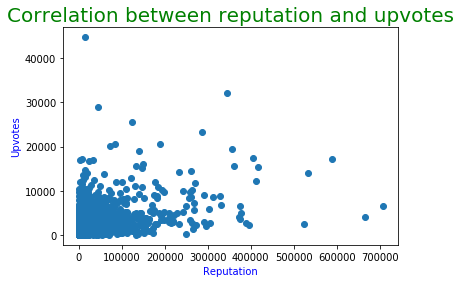

In [72]:
# plotting scatterplot
plt.scatter(reputation, upvotes)

plt.title("Correlation between reputation and upvotes", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Reputation", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Upvotes", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})

# necessary command to display graph
plt.show()

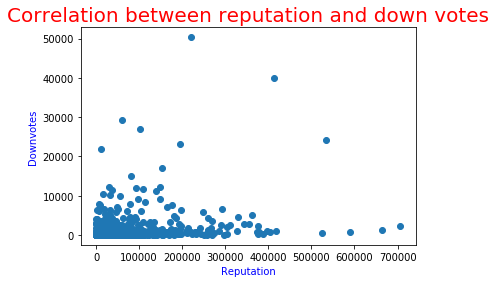

In [73]:
# plotting scatterplot
plt.scatter(reputation, downvotes)

plt.title("Correlation between reputation and down votes", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Red'})

plt.xlabel("Reputation", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})
plt.ylabel("Downvotes", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Blue'})

# necessary command to display graph
plt.show()

In [0]:
# Before removing the NaN values from OwnerUserId column, impute the value as zero so that we can decide later whether this can be dropped or not from Answer data Set
inpAns["OwnerUserId"].fillna(0, inplace = True)

In [0]:
inpAns.OwnerUserId = inpAns.OwnerUserId.astype('int64')

In [0]:
inpAns['IsDataScienceAnswer'] = 'N'

In [77]:
inpAns.isnull().sum()

Id                     0
OwnerUserId            0
CreationDate           0
ParentId               0
Score                  0
Body                   0
IsDataScienceAnswer    0
dtype: int64

In [78]:
inpAns.Score.describe()

count    2.014516e+06
mean     2.480563e+00
std      1.590938e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.718000e+03
Name: Score, dtype: float64

In [0]:
inpAns['ScoreGroup'] = pd.cut(inpAns.Score, [-50,-25,0,50,100,1000,2500,6000], labels=["Very Low","Low","Lower Medium","Higher Medium", "Low High", "High","Very High"])

In [0]:
inpAns.Score.max()

5718

In [80]:
inpAns.Score.min()

-42

In [81]:
inpAns.Score.median()

1.0

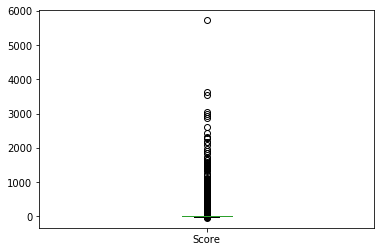

In [82]:
inpAns["Score"].plot(kind="box")

In [83]:
inpAns.ScoreGroup.value_counts()

Lower Medium     1192971
Low               812188
Higher Medium       5683
Low High            3608
High                  53
Very High              8
Very Low               5
Name: ScoreGroup, dtype: int64

In [0]:
dataScienceTagList=['r', 'matlab', 'excel','sql', 'sas', 'python']
dataScienceTagList
# Impute in a new column whether the Question belongs to the DataScience Category or not in the Questions DataSet
for dataScienceTag in dataScienceTagList:
  QuestionIdListRelatedToDataScience = inpQuesTags[inpQuesTags['Tag'].str.lower()==dataScienceTag].Id.tolist()
  inpAns.loc[inpAns.ParentId.isin(QuestionIdListRelatedToDataScience),"IsDataScienceAnswer"]="Y"

In [85]:
inpAns.head(100)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body,IsDataScienceAnswer,ScoreGroup
0,92,61,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",N,Lower Medium
1,124,26,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...,N,Lower Medium
2,199,50,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...,N,Lower Medium
3,269,91,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur...",N,Lower Medium
4,307,49,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article...",N,Lower Medium
...,...,...,...,...,...,...,...,...
95,2855,36,2008-08-05 21:05:10+00:00,2840,0,<p>I believe you'd need to perform a separate ...,Y,Low
96,2908,1384652,2008-08-05 21:52:44+00:00,2900,1,"<p>Just to check, if you use <strong>just</str...",N,Lower Medium
97,2911,271,2008-08-05 21:56:20+00:00,2900,1,<p>Does the apache user require a password to ...,N,Lower Medium
98,2915,457,2008-08-05 22:02:23+00:00,2900,0,<p>If indeed you are able to insert using the ...,N,Low


In [0]:
inpAns['response_flag'] = np.where(inpAns.IsDataScienceAnswer=="Y",1,0) 

In [0]:
res = pd.pivot_table(data=inpAns, index="Score", columns="ScoreGroup", values="response_flag" )

In [88]:
res

ScoreGroup,Very Low,Low,Lower Medium,Higher Medium,Low High,High,Very High
Score,,,,,,,
-42,0.0,NaN,NaN,NaN,NaN,NaN,NaN
-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN
-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN
-24,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
-23,NaN,0.333333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2988,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3038,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3549,NaN,NaN,NaN,NaN,NaN,NaN,0.0


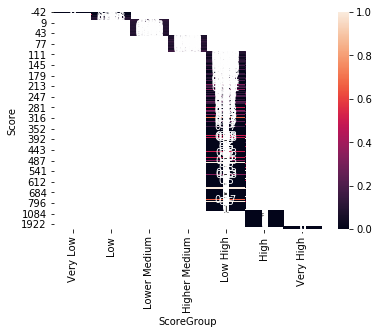

<Figure size 1296x864 with 0 Axes>

In [89]:
sns.heatmap(res, annot=True) 
plt.figure(figsize=[18,12])
plt.show()

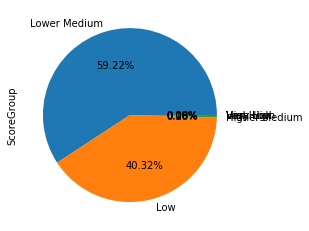

In [90]:
inpAns.ScoreGroup.value_counts(normalize=True).plot(kind="pie",  autopct='%1.2f%%')

In [91]:
inpUsers.up_votes.describe()

count    465460.000000
mean        192.808177
std         640.398587
min           0.000000
25%           3.000000
50%          26.000000
75%         130.000000
max      100520.000000
Name: up_votes, dtype: float64

In [92]:
inpUsers.up_votes.max()

100520

In [93]:
inpUsers.up_votes.quantile([0.5, 0.7, 0.9, 0.95 and 0.99])

0.50      26.00
0.70      93.00
0.90     465.00
0.99    2543.41
Name: up_votes, dtype: float64

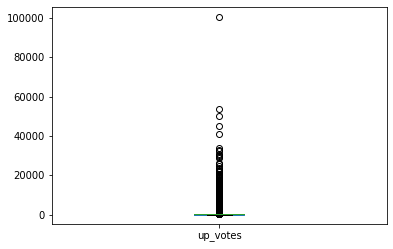

In [95]:
inpUsers["up_votes"].plot(kind="box")

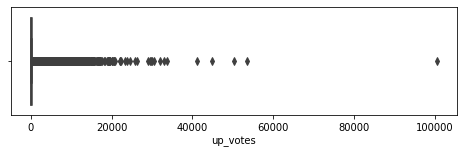

In [96]:
plt.figure(figsize=[8,2])
sns.boxplot(inpUsers.up_votes)
plt.show()

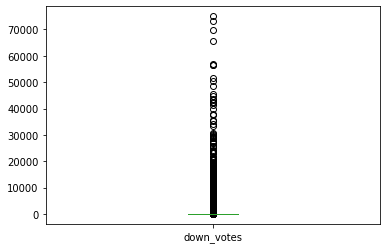

In [97]:
inpUsers["down_votes"].plot(kind="box")

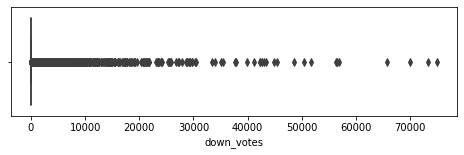

In [98]:
plt.figure(figsize=[8,2])
sns.boxplot(inpUsers.down_votes)
plt.show()

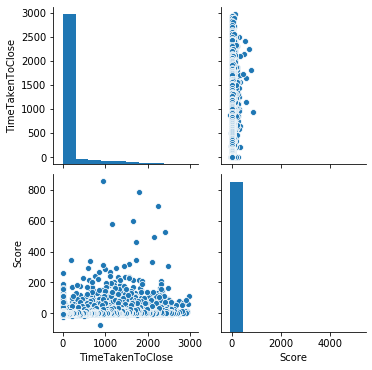

In [99]:
# Plot the pair plot to check the relationship between TimeTakenToClose a question and the Score to the Question
sns.pairplot(data=inpQues, vars=["TimeTakenToClose", "Score"])
plt.show()

**QUESTION #1**

When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

In [0]:
# Get the List of Users who have answered a DataScience Question
dataScienceTagList = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']  
for dataScienceTag in dataScienceTagList:
  QuestionIdListRelatedToDataScience = inpQuesTags[inpQuesTags['Tag'].str.lower()==dataScienceTag].Id.tolist()
  DataScienceAnswersUsersList = inpAns[inpAns['ParentId'].isin(QuestionIdListRelatedToDataScience)]

# Get the List of Users who have posted a DataScience Question
# These users could also potentially answer a DataScience Question
DataScienceQuestionsUsersList = inpQues[inpQues.IsDataScience == 'Y'] 

AnswerUserList = DataScienceAnswersUsersList[DataScienceAnswersUsersList.OwnerUserId != 0].OwnerUserId.unique().tolist()
QuestionUserList = DataScienceQuestionsUsersList[DataScienceQuestionsUsersList.OwnerUserId != 0].OwnerUserId.unique().tolist()

TempUserList  = []
FinalUserList = []
userNameList  = []

TempUserList = QuestionUserList+AnswerUserList

FinalUserList = list(set(TempUserList))

userDetails = inpUsers[inpUsers['id'].isin(FinalUserList)]

# Expert DataScience DataFrame 
expertDataScienceUsersDf = userDetails[['id', 'display_name']]



**QUESTION #2**

When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

In [0]:
#Create a DataFrame to hold the datascience tag and the average time to get a response
# 
avgResponseTimeList = []

dataScienceTagList = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']  
for dataScienceTag in dataScienceTagList:
  QuestionIdListRelatedToDataScience = inpQuesTags[inpQuesTags['Tag'].str.lower()==dataScienceTag].Id.tolist()
  answerDateList = inpAns[inpAns['ParentId'].isin(QuestionIdListRelatedToDataScience)]
  avgResponseTime = answerDateList.CreationDate.dt.day.mean()
  avgResponseTimeList.append(avgResponseTime)

data = {'DataScienceTag':dataScienceTagList, 'AverageTimeToAnswer':avgResponseTimeList} 

# Average ResponseTime DataFrame 
avgResponseTimeDf = pd.DataFrame(data) 
  


In [103]:
print(avgResponseTimeDf)

  DataScienceTag  AverageTimeToAnswer
0         python            15.776688
1              r            15.752655
2         matlab            15.526618
3            sas            14.554286
4          excel            15.524457
5            sql            15.606709
